In [1]:
import csv
from pandas import DataFrame
import pandas as pd

column = ['Title','Body']
dfBA = DataFrame(columns=column)
dfT = DataFrame(columns=[0, 1, 2, 3, 4])

In [2]:
def create_data_frame(data):
    t = {}
    d = {
        'Title': [data[0]],
        'Body': [data[1]],
    }

    for n in range(5):
        if len(data[2]) > n:
            t[n] = [data[2][n]]
        else:
            t[n] = ['0']
        
    df = DataFrame(data=d)

    global dfBA, dfT
    
    dfBA = dfBA.append(df)
    dfT = dfT.append(DataFrame(data=t))

In [3]:
def parser(path):
    with open(path) as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        tags = []

        for row in reader:
            tags = tuple([x for x in row[2:-1] if x != ''])
            terms = [row[0], row[1], tags]
            create_data_frame(terms)

In [4]:
path = 'data/vzn/TrainingData.csv'
parser(path)
import pandas as pd
df = pd.concat([dfBA, dfT], axis=1)

In [5]:
dfBA

,Title,Body
0,Search Query,Coded Terms
0,verizon,brand
0,verizon wireless,brand
0,iphone 7,"phones, apple, iphone, iphone 7"
0,iphone 7 plus,"phones, apple, iphone, iphone 7, iphone 7 plus"
0,my verizon,"brand, my verizon"
0,verizon wireless login,"brand, log-in"
0,google pixel,"phones, Google, Pixel"
0,iphone 6,"phones, apple, iphone, iphone 6"
0,verizon customer service,"brand, support, customer service"


In [6]:
dfT

,0,1,2,3,4
0,Term 1,Term 2,Term 3,Term 4,Term 5
0,brand,0,0,0,0
0,brand,0,0,0,0
0,phones,apple,iphone,iphone 7,0
0,phones,apple,iphone,iphone 7,iphone 7 plus
0,brand,my verizon,0,0,0
0,brand,log-in,0,0,0
0,phones,Google,Pixel,0,0
0,phones,apple,iphone,iphone 6,0
0,brand,support,customer service,0,0


In [7]:
from nltk.corpus import stopwords

stopWordList=stopwords.words('english')
stopWordList.remove('no')
stopWordList.remove('not')

import unicodedata
import spacy


def removeAscendingChar(data):
    data=unicodedata.normalize('NFKD', data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return data

def removeCharDigit(text):
    str='`1234567890-=~@#$%^&*()_+[!{;":\'><.,/?"}]'
    for w in text:
        if w in str:
            text=text.replace(w,'')
    return text

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer


lemma=WordNetLemmatizer()
token=ToktokTokenizer()

def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w,'v')
        #print(x)
        listLemma.append(x)
    return text

def stopWordsRemove(text):
    
    wordList=[x.lower().strip() for x in token.tokenize(text)]
    
    removedList=[x for x in wordList if not x in stopWordList]
    text=' '.join(removedList)
    #print(text)
    return text

def PreProcessing(text):
    text = removeAscendingChar(text)
    text = removeCharDigit(text)
    text = lemitizeWords(text)
    text = stopWordsRemove(text)

    return text

In [8]:
totalText=''

for x in df['Body']:
    ps = PreProcessing(x)
    totalText = totalText + " " + ps

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wc=WordCloud(max_font_size=60).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")

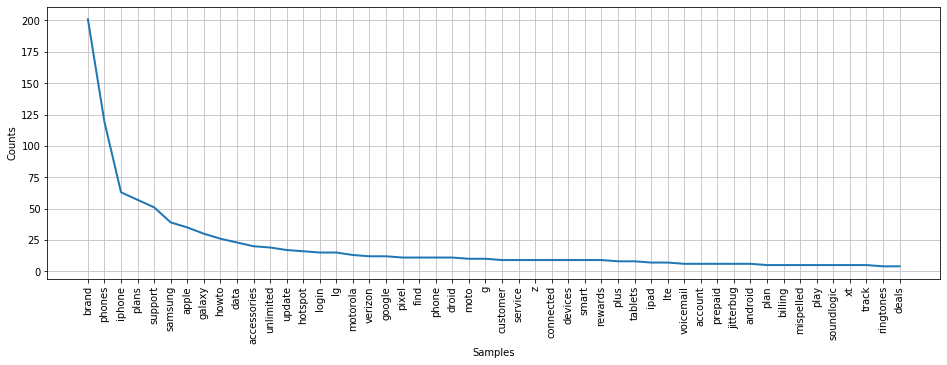

In [10]:
import nltk

freqdist = nltk.FreqDist(token.tokenize(totalText))
plt.figure(figsize=(16,5))
freqdist.plot(50)

In [11]:
totalText=''

for x in df['Title']:
    ps=PreProcessing(x)
    totalText=totalText+" "+ps

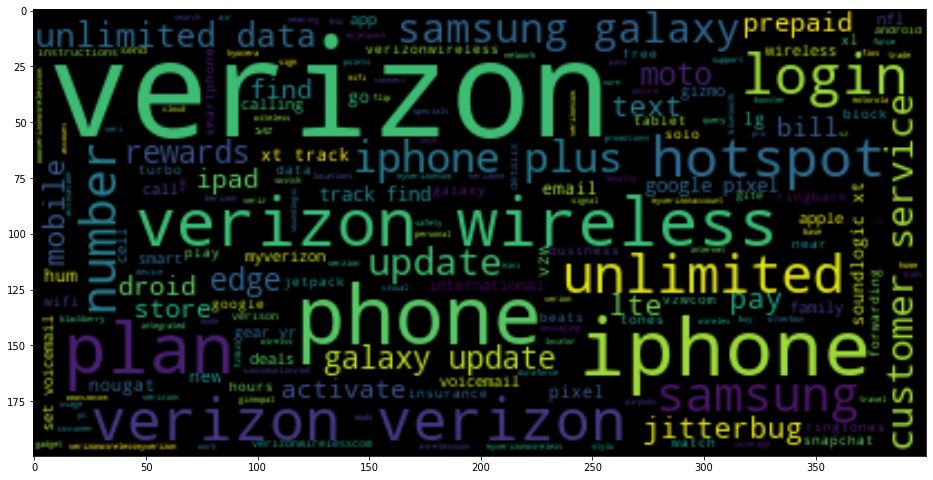

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc=WordCloud(max_font_size=60).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")



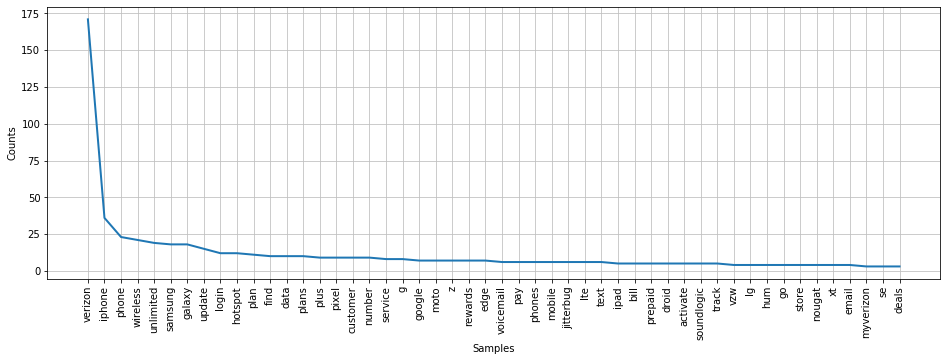

In [13]:
import nltk

freqdist = nltk.FreqDist(token.tokenize(totalText))
freqdist
plt.figure(figsize=(16,5))
freqdist.plot(50)

In [14]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2:-1]

In [15]:
okList=[]
for cl in dfT.columns:
     for n in df[cl]:
            okList.append(n)
okList=list(set(okList))
del(okList[okList.index('0')])

In [16]:
print(okList)

[' s5', 'log-in', 'how-to', ' XT track and find', ' samsung', 'brand Retail', ' lg', ' lgv20', 'brand Retail Proximity', ' apple', ' iphone 6', ' hours', 'brand Contact', 'brand Plans Prepaid', ' moto mods', ' desire 530', ' customer service', 'Term 2', ' mifi', ' iphone 6 plus', ' intenational', ' jitterbug', 'accessories', ' kyocera', ' network', ' what is', ' stores', ' fitbit', ' droid', ' 4G LTE', 'What is 4G LTE', ' ipad air 2', ' business', ' coverage map', ' insurance', ' iphone se', ' beats solo 2', ' Google', 'brand Plans', ' family plans', ' moto z', ' connected devices', ' google home', ' ipad', ' near me', ' moto', 'Hotspot', ' phone cases', ' zenpad', ' lg g5', ' ringtones', ' support', 'What is LTE', ' smart rewards', ' switch', ' turbo', ' google', 'brand', ' airpods', ' android', ' iphone 7', ' go90', ' apple watch', ' z8 ', 'go90', ' lg gizmo gadget', 'connected devices', 'phone', 'What is 4G ', ' motorola', ' s7', ' asus', ' htc', ' headphones', ' iphone 6s plus', ' 

In [17]:
newDF=DataFrame(columns=okList)

In [18]:
for x in range(dfT.count()[0]):
    someDict={}
    for d in okList:
        rowdata=list(dfT.iloc[x])
        if d in rowdata:
            someDict[d]=1
        else:
            someDict[d]=0
    newDF=newDF.append(someDict,ignore_index=True)

In [19]:
newDF

,s5,log-in,how-to,XT track and find,samsung,brand Retail,lg,lgv20,brand Retail Proximity,apple,...,Pixel,hum,JItterbug,ipad mini,billing,band,Term 1,moto z play,iphone 7 plus,lg gizmo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dfBA.index=range(dfBA.count()[0])
df=dfBA.join(newDF)

In [21]:
df

,Title,Body,s5,log-in,how-to,XT track and find,samsung,brand Retail,lg,lgv20,...,Pixel,hum,JItterbug,ipad mini,billing,band,Term 1,moto z play,iphone 7 plus,lg gizmo
0,Search Query,Coded Terms,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,verizon,brand,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,verizon wireless,brand,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,iphone 7,"phones, apple, iphone, iphone 7",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,iphone 7 plus,"phones, apple, iphone, iphone 7, iphone 7 plus",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,my verizon,"brand, my verizon",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,verizon wireless login,"brand, log-in",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,google pixel,"phones, Google, Pixel",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,iphone 6,"phones, apple, iphone, iphone 6",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,verizon customer service,"brand, support, customer service",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Binary relevance

In [22]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2:-1].values
# using binary relevance
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
x1=df.Title
x2=df.Body
from pandas import DataFrame
cv=CountVectorizer().fit(x1)
header=DataFrame(cv.transform(x1).todense(),columns=cv.get_feature_names())
cvArticle=CountVectorizer().fit(x2)
article=DataFrame(cvArticle.transform(x2).todense(),columns=cvArticle.get_feature_names())
import pandas as pd
x=pd.concat([header,article],axis=1)

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfhead=TfidfTransformer().fit(header)
head=DataFrame(tfidfhead.transform(header).todense())
tfidfart=TfidfTransformer().fit(article)
art=DataFrame(tfidfart.transform(article).todense())
import pandas as pd
x=pd.concat([head,art],axis=1)

In [24]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))

predictions = classifier.predict(xtest.astype(float))
predictions.toarray()
from sklearn.metrics import accuracy_score
accuracy_score(ytest.astype(float),predictions)

0.21951219512195122

### Classifier chains

In [25]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))

# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.2682926829268293

### Label powerset

In [26]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))
# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.4878048780487805

### MLkNN

In [27]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=7)

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))
# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.2926829268292683